Populating the interactive namespace from numpy and matplotlib


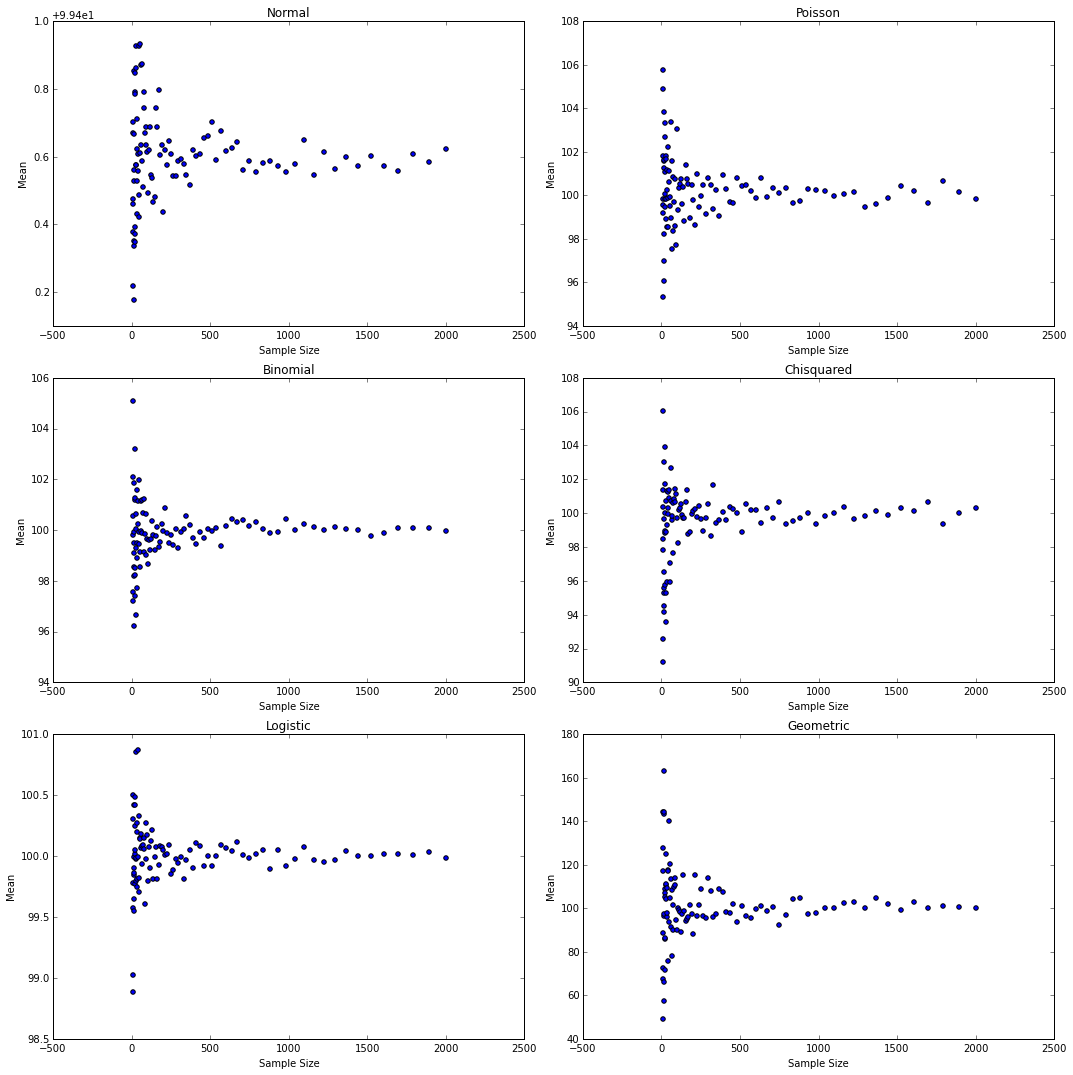

In [1]:
%pylab inline
import numpy as np
import pylab as pl

# Create a class to store the distribution function and results
class Dist:
    def __init__(self, title, f, ax):
        self.f = f
        self.title = title
        self.ax = ax
        self.results = []
        
    def generate(self, size, mean):
        r = self.f(size, mean).mean()
        self.results.append(r)
        return r
        
# Set up parameters
mean = 100
min_size = 9 #The minimum size MINUS 1.
max_size = 2000
num_samples = 100

# Create the figures
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(figsize=(15,15), nrows=3, ncols=2)


# Create a Dist for each distribution
dists = [
    Dist('Normal', lambda size, mean: np.random.randn(size) + mean, ax1),
    Dist('Poisson', lambda size, mean: np.random.poisson(mean, size=size), ax2),
    Dist('Binomial', lambda size, mean: np.random.binomial(2*mean, .5, size=size), ax3),
    Dist('Chisquared', lambda size, mean: np.random.chisquare(mean, size=size), ax4),
    Dist('Logistic', lambda size, mean: np.random.logistic(mean, size=size), ax5),
    Dist('Geometric', lambda size, mean: np.random.geometric(1./mean, size=size), ax6)
]

# Generate an array of samples sizes
sizes = np.logspace(log10(min_size), log10(max_size), num_samples)

# For each distribution generate a mean given a sample size and then scatter plot them.
for dist in dists:
    for size in sizes:
        dist.generate(size, mean)

    dist.ax.scatter(sizes,dist.results)
    dist.ax.set_xlabel('Sample Size')
    dist.ax.set_ylabel('Mean')
    dist.ax.set_title(dist.title)

plt.tight_layout()

The sample means converge towards the actual mean as the sample size increases.

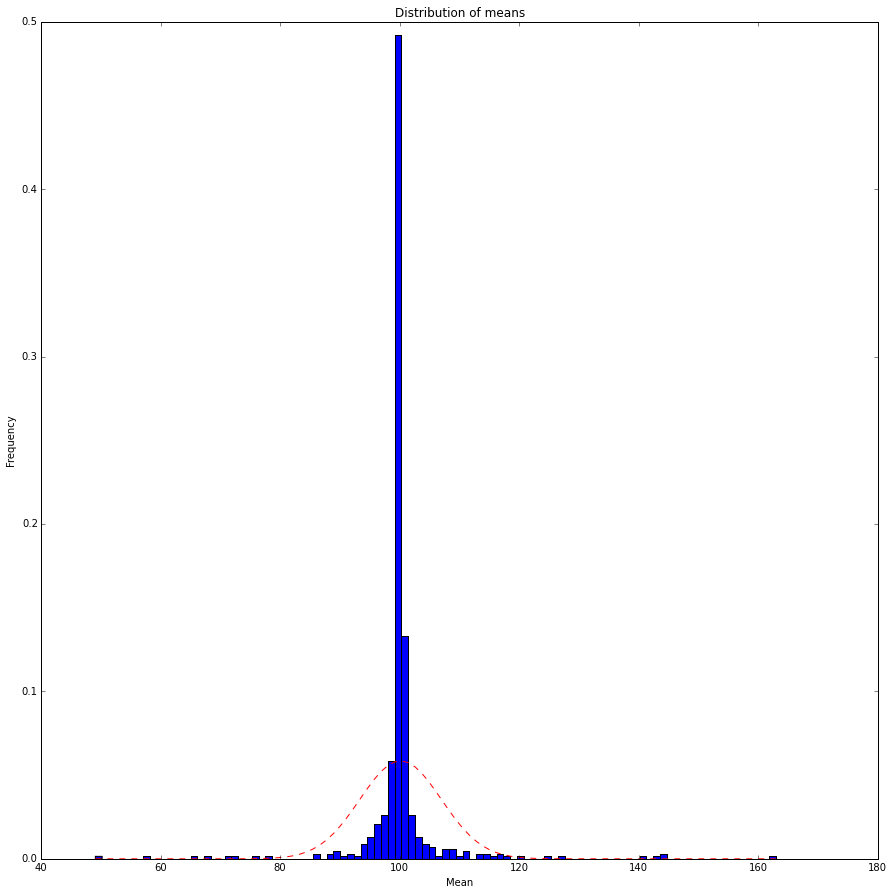

In [2]:
from scipy.stats import norm
import matplotlib.mlab as mlab

# Combine The means
means = []
for dist in dists:
    means = means + dist.results

# Plot Histogram
plt.figure(figsize= (15,15))
n, bins, patches = plt.hist(means, bins=100, color='blue', normed=True)
plt.title('Distribution of means')
plt.ylabel('Frequency')
plt.xlabel('Mean')
    
# Fit a normal distribution to the histogram
mu, sigma = norm.fit(means)
y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, 'r--')